<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/makeArxivAbstract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as plt
import glob 
%pylab inline
from google.colab import drive

drive.mount("/content/gdrive")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My\ Drive/MLTSA2020

/content/gdrive/My Drive/MLTSA2020


In [3]:
!mkdir checkpoints

mkdir: cannot create directory ‘checkpoints’: File exists


# skip to next section to read in saved data

In [0]:
import urllib
url = 'http://export.arxiv.org/api/query?search_query=all:a&start=0&max_results=10000'


In [0]:
import urllib.request


with urllib.request.urlopen(url) as response:
   html = response.read()
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')



In [0]:
print(soup.find_all('summary')[0].text)

  A masses of a leptons deduced from a representation of a probability density
vector by a spinors. A massive W and Z bosons and a massless A boson are
obtained from a transformations for which a density vector is invariant.



In [0]:
N = len(soup.find_all('summary')[:])
N

6400

In [0]:
soup.find_all('summary')[0].text.replace("\n", " ") + soup.find_all('summary')[1].text.replace("\n", " ")

'  A masses of a leptons deduced from a representation of a probability density vector by a spinors. A massive W and Z bosons and a massless A boson are obtained from a transformations for which a density vector is invariant.   We give a partial answer to a conjecture of A. Balog, concerning the size of AA+A, where A is a finite subset of real numbers. Also, we prove several new results on the cardinality of A:A+A, AA+AA and A:A + A:A. '

In [0]:

text = ''
for i in range(int(N/10)):
  text += soup.find_all('summary')[i].text.replace("\n", " ") 

In [0]:
text = text.replace("  ", " ").replace("  ", " ").replace("  ", " ")

In [0]:
text = text[1:]
text

'A masses of a leptons deduced from a representation of a probability density vector by a spinors. A massive W and Z bosons and a massless A boson are obtained from a transformations for which a density vector is invariant. We give a partial answer to a conjecture of A. Balog, concerning the size of AA+A, where A is a finite subset of real numbers. Also, we prove several new results on the cardinality of A:A+A, AA+AA and A:A + A:A. A rhombus tiling of a hexagon is said to be centered if it contains the central lozenge. We compute the number of vertically symmetric rhombus tilings of a hexagon with side lengths $a, b, a, a, b, a$ which are centered. When $a$ is odd and $b$ is even, this shows that the probability that a random vertically symmetric rhombus tiling of a $a, b, a, a, b, a$ hexagon is centered is exactly the same as the probability that a random rhombus tiling of a $a, b, a, a, b, a$ hexagon is centered. This also leads to a factorization theorem for the number of all rhombu

In [0]:
 text.translate?

In [0]:
#removing some characters:
for c in [u"\\", u"$",  u"\t", u"\n", u"  "]:
  test= text.translate({ord(k):None for k in c})
                      


In [0]:
outF = open("myOutFile.txt", "w")
outF.write(text)
outF.close()

# read in the saved file

In [0]:

outF = open("myOutFile.txt", "r")
text = outF.read()
outF.close()

# preprocessing string into proper data

In [5]:
chars = sorted(list(set(text)))
len(chars)
for c in chars:
  print (c)

 
!
"
#
$
%
&
'
(
)
*
+
,
-
.
/
0
1
2
3
4
5
6
7
8
9
:
;
<
=
>
?
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
[
\
]
^
_
`
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
{
|
}
~


In [0]:

# covert characters to numbers
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))


In [7]:
for i in range(len(chars)):
  print(i, int_to_char[i])

0  
1 !
2 "
3 #
4 $
5 %
6 &
7 '
8 (
9 )
10 *
11 +
12 ,
13 -
14 .
15 /
16 0
17 1
18 2
19 3
20 4
21 5
22 6
23 7
24 8
25 9
26 :
27 ;
28 <
29 =
30 >
31 ?
32 A
33 B
34 C
35 D
36 E
37 F
38 G
39 H
40 I
41 J
42 K
43 L
44 M
45 N
46 O
47 P
48 Q
49 R
50 S
51 T
52 U
53 V
54 W
55 X
56 Y
57 Z
58 [
59 \
60 ]
61 ^
62 _
63 `
64 a
65 b
66 c
67 d
68 e
69 f
70 g
71 h
72 i
73 j
74 k
75 l
76 m
77 n
78 o
79 p
80 q
81 r
82 s
83 t
84 u
85 v
86 w
87 x
88 y
89 z
90 {
91 |
92 }
93 ~


In [8]:
n_chars = len(text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  395832
Total Vocab:  94


In [9]:
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 5):
	seq_in = text[i:i + seq_length]
	seq_out = text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  79147


# models

In [10]:
# Load Larger LSTM network and generate text
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

X.shape

Using TensorFlow backend.


(79147, 100, 1)

In [0]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), 
               return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
# load the network weights
#filename = "weights-improvement-47-1.2219-bigger.hdf5"
#model.load_weights(filename)
model.compile( loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [0]:
EPOCHS = 10
RUNS = 1000
# generate characters
def generatecharacters(model, pattern, iteration, ):
  patternout = []
  for i in range(100):
    if len(pattern) > 100:
      pattern = pattern[1:101]
      #print ("wrong pattern")
      #print(pattern)
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    #print(prediction)
    index = np.argmax(prediction)
    #print(index)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    #print(result)
    #print(seq_in)
    pattern.append(index)
    patternout.append(int_to_char[index])
    #print("length sentence", len(patternout))
    pattern = pattern[1:len(pattern)]
    
  print("### new sentence: %d"%iteration, "".join(patternout))
  outF = open("newSentencesEPOCHS{}_runs{}.txt".format(EPOCHS, RUNS), "a")
  outF.write("%d:"%iteration + "".join(patternout))
  outF.close()

In [13]:
np.random.seed(121)
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print (len(dataX[start]))
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
print(len(pattern))


100
" progress towards a conjecture of Erd\"os and Szemer\'edi on sum and product sets. The detailed study "
100


### The network will learn fo 10,000 epoch, split into 1,000 sets of 10 epochs with a warm restart each time (picks up learning from the best of the previous 10 epochs by loading the best set of weights to start). After every epoch it will print the prediction, based on the same "seed": the sentence above. By reading the lines of output starting with 
\#\#\# new sentence: 
you can see how much learning the RNN does in 10 epochs

In [0]:
#cheap way to print out the intermediate sentences every 10 training steps

losses = []

# define the checkpoint
for i in range(RUNS):
  tmp = "-%05d.hsf5"%i
  filepath="checkpoints/weights-improvement-{epoch:02d}-{loss:.4f}" + tmp
  checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
  callbacks_list = [checkpoint]
  history = model.fit(X, y, epochs=EPOCHS, batch_size=1280, 
                    callbacks=callbacks_list, shuffle=True)
  model.save_weights("model.h5")
  print("Saved model to disk")
 
  plt.plot(history.history['loss'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  losses.append(history.history['loss'][-1])
  # The model weights (that are considered the best) are loaded into the model.
  model.load_weights(filepath.format(epoch=EPOCHS, 
                                     loss=losses[-1]) )
  pattern = dataX[start]
  try:
    generatecharacters(model, pattern, i)
  except ValueError:
    print('generatecharacters failed')

the code broke after the first 17 10-epoch runs: 170 epochs: its because i assumed the last loss was going to be the minimum one, and thereore saved, but it isnt always. good thing i maniacally saved everything about it. Lets look at the 170 sentences I saved ( tho I forgot to add line character return so I have to split the string into 100-long sentences). 

In [91]:
outF = open("myOutFile.txt", "r")
newabstracts = outF.read()
for i in range(17): 
  print(newabstracts[100*i: 100*i + 100], "\n")

A masses of a leptons deduced from a representation of a probability density vector by a spinors. A  

massive W and Z bosons and a massless A boson are obtained from a transformations for which a densit 

y vector is invariant. We give a partial answer to a conjecture of A. Balog, concerning the size of  

AA+A, where A is a finite subset of real numbers. Also, we prove several new results on the cardinal 

ity of A:A+A, AA+AA and A:A + A:A. A rhombus tiling of a hexagon is said to be centered if it contai 

ns the central lozenge. We compute the number of vertically symmetric rhombus tilings of a hexagon w 

ith side lengths $a, b, a, a, b, a$ which are centered. When $a$ is odd and $b$ is even, this shows  

that the probability that a random vertically symmetric rhombus tiling of a $a, b, a, a, b, a$ hexag 

on is centered is exactly the same as the probability that a random rhombus tiling of a $a, b, a, a, 

 b, a$ hexagon is centered. This also leads to a factorization theorem fo

In [28]:
tmp = "-%05d.hsf5"%17
weights = glob.glob("checkpoints/weights-improvement-10-*" + tmp)[0]
weights

'checkpoints/weights-improvement-10-1.0063-00017.hsf5'

the loop crashed, restarting from where it left off: at the 17th run 10th epochs

In [0]:
model.load_weights(weights)
  

Epoch 1/10
79147/79147 [==============================] - 26s 326us/step - loss: 0.9563 - accuracy: 0.7036

Epoch 00001: loss improved from inf to 0.95629, saving model to checkpoints/weights-improvement-01-0.9563-00018.hsf5
Epoch 2/10
79147/79147 [==============================] - 26s 327us/step - loss: 0.9540 - accuracy: 0.7039

Epoch 00002: loss improved from 0.95629 to 0.95397, saving model to checkpoints/weights-improvement-02-0.9540-00018.hsf5
Epoch 3/10
79147/79147 [==============================] - 26s 332us/step - loss: 0.9528 - accuracy: 0.7041

Epoch 00003: loss improved from 0.95397 to 0.95282, saving model to checkpoints/weights-improvement-03-0.9528-00018.hsf5
Epoch 4/10
79147/79147 [==============================] - 26s 333us/step - loss: 0.9469 - accuracy: 0.7045

Epoch 00004: loss improved from 0.95282 to 0.94687, saving model to checkpoints/weights-improvement-04-0.9469-00018.hsf5
Epoch 5/10
79147/79147 [==============================] - 26s 328us/step - loss: 0.9414 

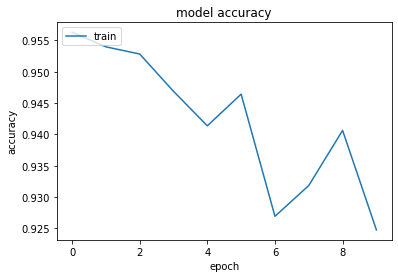

NameError: ignored

In [32]:
#cheap way to print out the intermediate sentences every 10 training steps

losses2 = []

# define the checkpoint
for i in range(18, RUNS):
  tmp = "-%05d.hsf5"%i
  filepath="checkpoints/weights-improvement-{epoch:02d}-{loss:.4f}" + tmp
  checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
  callbacks_list = [checkpoint]
  history = model.fit(X, y, epochs=EPOCHS, batch_size=1280, 
                    callbacks=callbacks_list, shuffle=True)
  print("Saved model to disk")
 
  plt.plot(history.history['loss'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  losses.append(history.history['loss'][-1])
  # The model weights (that are considered the best) are loaded into the model.
  weights = glob.glob("checkpoints/weights-improvement-10-*" + tmp)[0]
  weights
  pattern = dataX[start]
  try:
    generatecharacters(model, pattern, i)
  except ValueError:
    print('generatecharacters failed')

In [0]:
tmp = "-%05d.hsf5"%9
filepath="checkpoints/weights-improvement-{epoch:02d}-{loss:.4f}" + tmp
model.load_weights(filepath.format(epoch=2, loss=history.history['loss'][-1]) )
generatecharacters(model, pattern[:len(pattern)])

oteeng aod onoy if $A$ is a compect tuacefite of a compect ouopertie $\mathcal A$ is a compict $\mat


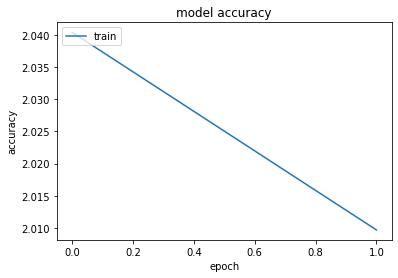

In [0]:
#plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
print("".join(patternout))


 cinite suace $A$ is a cinite space $A$ is a cinite space $A$ is a cinite space $A$ is a cinite spac


# later...
# notes:
- at the beginning it learns spaces, the most common character, and prints empty lines
- early most words are short and repeted obsessively
- in 20 epochsit learns "of a", obsessive repetition